# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Import the Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

## Reading & Understanding the data

In [2]:
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.shape

(730, 16)

## Checking for the presence of null values in any column.

In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bike_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Remove columns that are not relevant for the analysis.

1) The instant column serves as an index, so we will drop it.

2) The dteday and yr_month columns contain similar information; therefore, we will drop dteday to avoid redundancy.

3) Since cnt (our target variable) is the sum of casual and registered, we will exclude casual and registered from the analysis.

In [8]:
bike_data.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bike_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables

## Based on the data season, weathersit, weekday, holiday, mnth, workingday and yr are all categorical variables.

### Map descriptive names for improved visibility: season (1: Spring, 2: Summer, 3: Fall, 4: Winter)

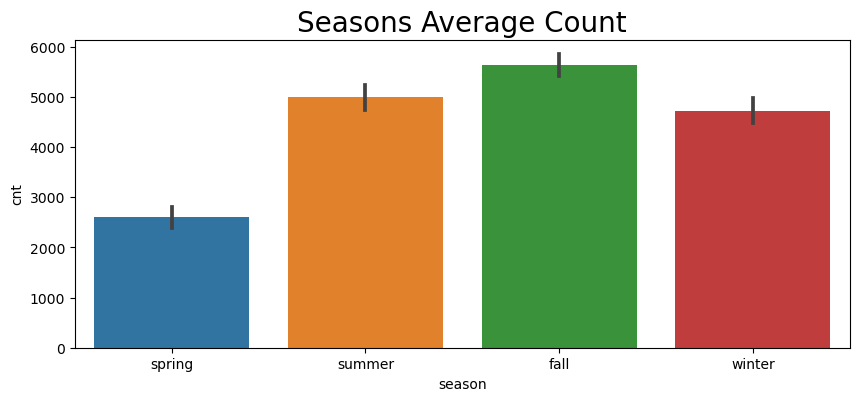

In [10]:
bike_data['season'] = bike_data['season'].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

plt.figure(figsize=[10, 4])
sns.barplot(x='season', y='cnt', data=bike_data)
plt.title('Seasons Average Count', fontsize=20)
plt.show()

#### In the fall, there appears to be the highest demand for rented bikes, followed by summer and winter.

### Map descriptive names for enhanced clarity: weathersit (1: 'Good', 2: 'Moderate', 3: 'Bad', 4: 'Severe')

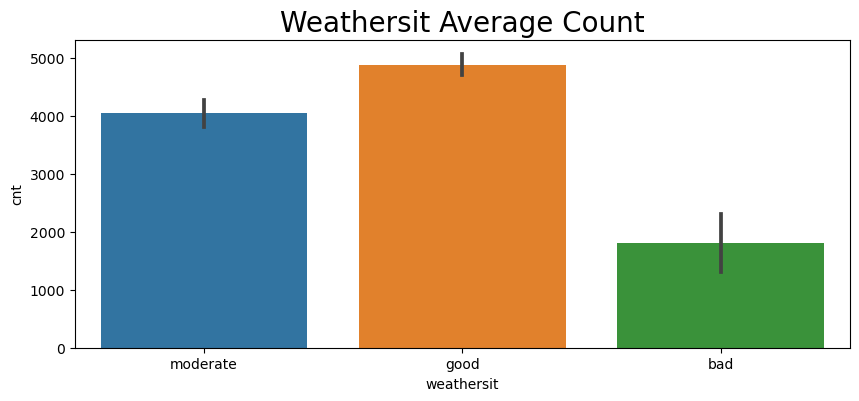

In [11]:
bike_data['weathersit']=bike_data['weathersit'].replace({1:'good',2:'moderate',3:'bad',4:'severe'})
plt.figure(figsize=[10, 4])
sns.barplot(x='weathersit', y='cnt', data=bike_data)
plt.title('Weathersit Average Count', fontsize=20)
plt.show()

#### It clearly shows that if the weather is clear, the demand is more

### Map descriptive names for enhanced clarity: Month (1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec')

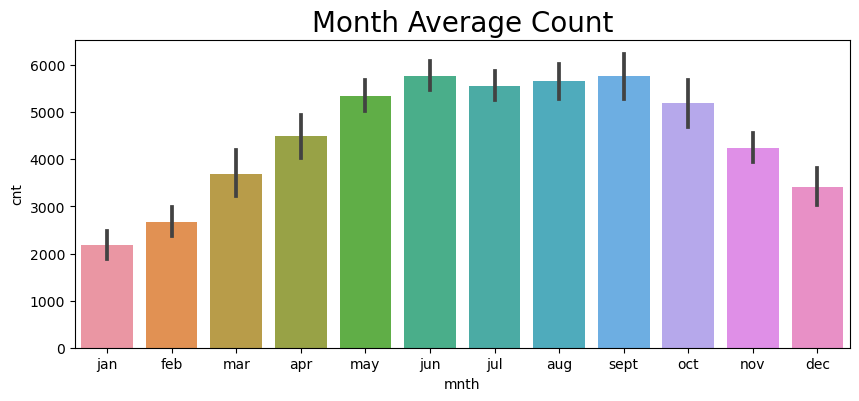

In [12]:
bike_data['mnth'] = bike_data['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

plt.figure(figsize=[10, 4])
sns.barplot(x='mnth', y='cnt', data=bike_data)
plt.title('Month Average Count', fontsize=20)
plt.show()

- There is a consistently high average count of rented bikes in August, June, September, and July, followed closely by May and October. The company should ensure high availability during these peak months. 
- Conversely, December, January, and February show the lowest demand, likely due to the winter season.

### Map descriptive names for enhanced clarity: Weekday (0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat')

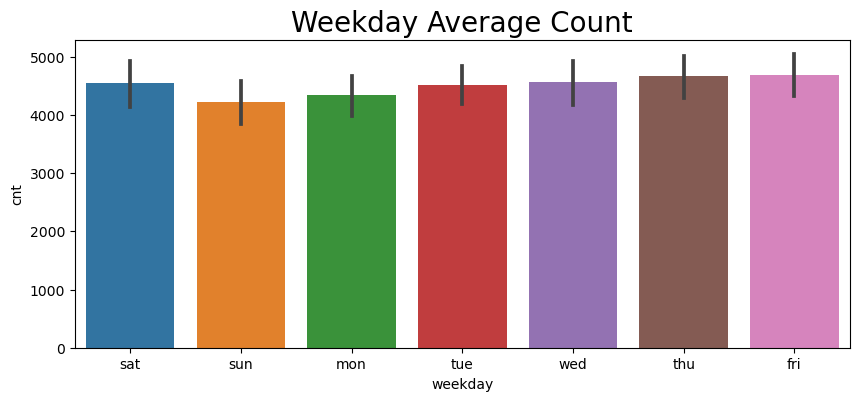

In [13]:
bike_data['weekday'] = bike_data['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
plt.figure(figsize=[10, 4])
sns.barplot(x='weekday', y='cnt', data=bike_data)
plt.title('Weekday Average Count', fontsize=20)
plt.show()

- It appears that the demand for rented bikes is generally consistent across all days. However, demand is notably higher on Sunday, Monday, Saturday, and Friday compared to other days.
- Conversely, people tend to prefer renting bikes less on Thursday, Wednesday, and Tuesday.

### Map descriptive names for enhanced clarity: Year (0: 2018 , 1: 2019)

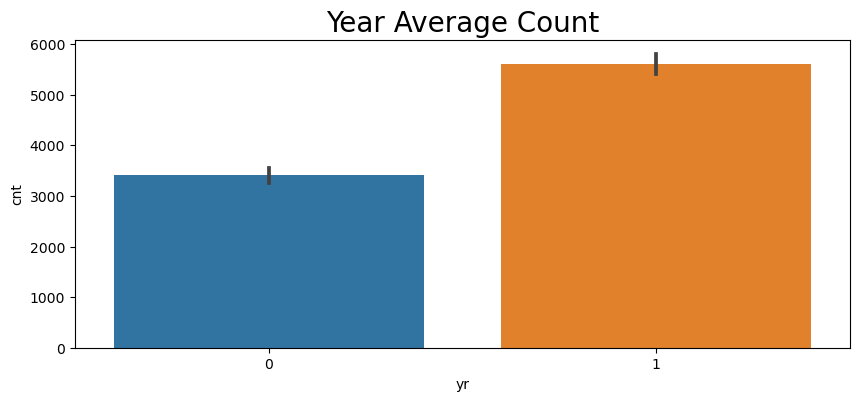

In [14]:
 bike_data['yr'].replace({0: '2018', 1: '2019'})
plt.figure(figsize=[10, 4])
sns.barplot(x='yr', y='cnt', data=bike_data)
plt.title('Year Average Count', fontsize=20)
plt.show()

- We can observe a significant trend: the average number of rented bikes nearly doubled in 2019 compared to 2018.

## Prepare the data for Model

In [15]:

bike_data['season'] = bike_data.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
bike_data['weathersit']=bike_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'})
bike_data['mnth'] = bike_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike_data['weekday']= bike_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


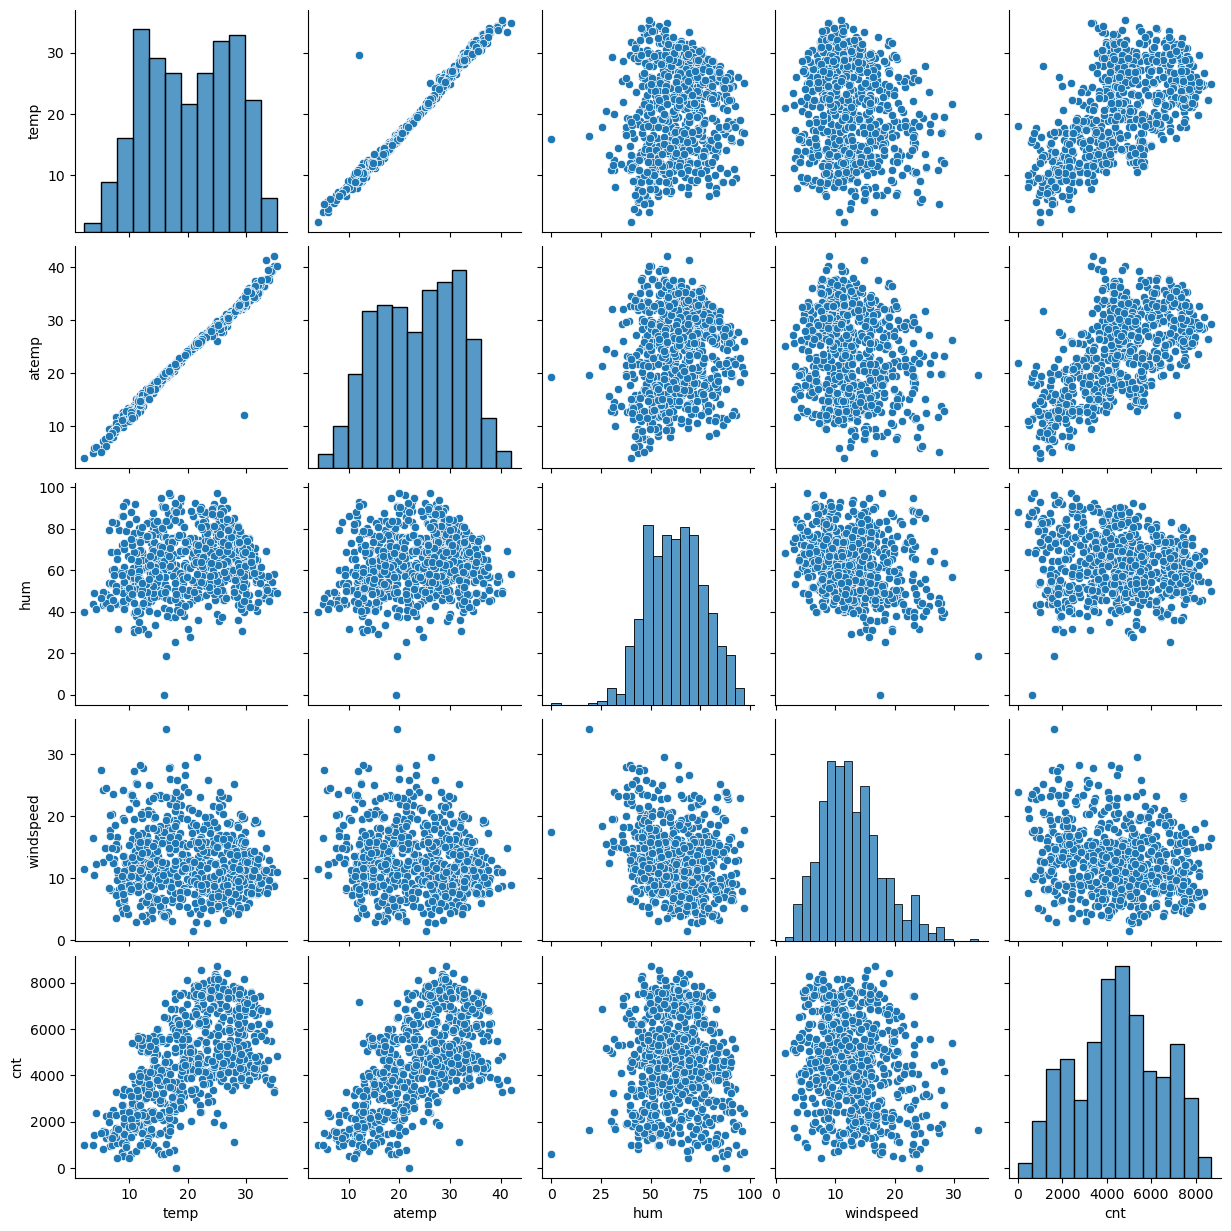

In [16]:
sns.pairplot(bike_data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

## Based on the data, temp, atemp, humidity, windspeed, and count are numeric variables.

### Correlation Graph for Numnerical variable

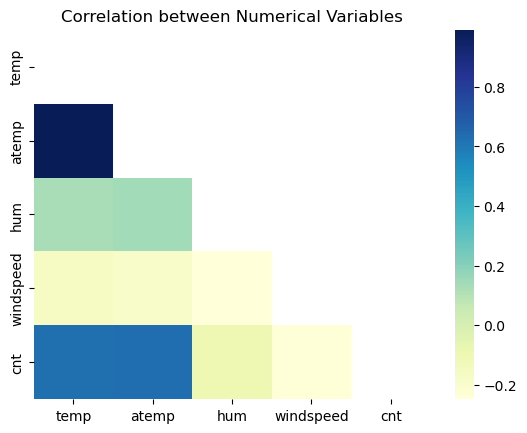

In [17]:
matrix = np.triu(bike_data[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike_data[['temp','atemp','hum','windspeed','cnt']].corr(),cmap ='YlGnBu',annot = True,  mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

## Regression of data 

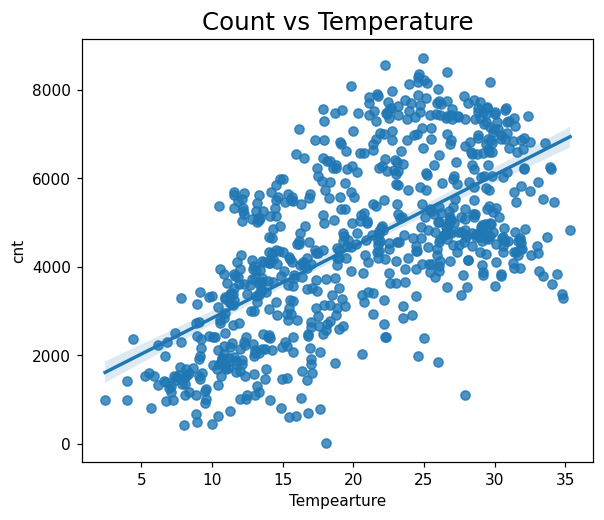

In [18]:
plt.figure(figsize=(6,5),dpi=110)
plt.title('Count vs Temperature',fontsize = 16)
sns.regplot(data = bike_data,y = 'cnt', x='temp')
plt.xlabel('Tempearture')
plt.show()

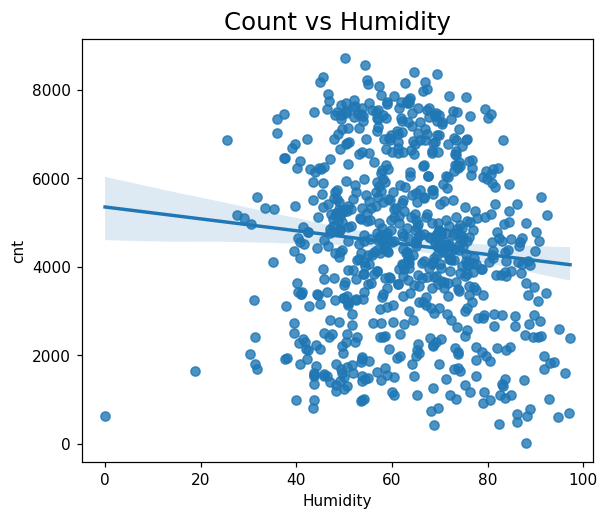

In [19]:
plt.figure(figsize = (6,5),dpi = 110)
plt.title('Count vs Humidity',fontsize = 16)
sns.regplot(data = bike_data, y = 'cnt', x ='hum')
plt.xlabel('Humidity')
plt.show()

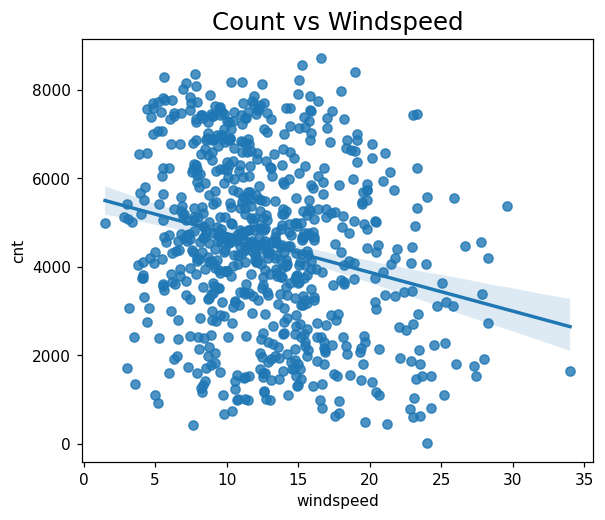

In [20]:
plt.figure(figsize =(6,5),dpi = 110)
plt.title('Count vs Windspeed',fontsize = 16)
sns.regplot(data = bike_data, y ='cnt', x = 'windspeed')
plt.show()

### Creating Dummy Variable For Categorical Data 

In [21]:
# List of categorical columns to create dummies
cat = ['season', 'mnth', 'weekday', 'weathersit']
 
# Create dummy variables
dummy = pd.get_dummies(bike_data[cat], drop_first=True).astype(int)
bike_data = pd.concat([bike_data, dummy], axis=1)
bike_data.drop(columns=cat, inplace=True)


bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


### Verifying the info of the dataset after generating dummy variables.

In [22]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    int32  
 9   season_summer        730 non-null    int32  
 10  season_winter        730 non-null    int32  
 11  mnth_aug             730 non-null    int32  
 12  mnth_dec             730 non-null    int32  
 13  mnth_feb             730 non-null    int32  
 14  mnth_jan             730 non-null    int32  
 15  mnth_jul             730 non-null    int

### Verifying the shapes of the dataset after generating dummy variables.

In [23]:
bike_data.shape

(730, 30)

### Verifying the columns of the dataset after generating dummy variables.

In [24]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

###  Splitting the dataset into training and testing sets.

In [25]:
from sklearn.model_selection import train_test_split

# Assuming bike_data is your DataFrame and 'cnt' is the target variable
X = bike_data.drop('cnt', axis=1)  
y = bike_data['cnt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Display the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (511, 29)
Testing data shape: (219, 29)


## Rescaling

In [26]:
# Instant the object
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [27]:
# create the list of Numeric value
num_vars = ['temp','atemp','hum','windspeed']

#Fit on the data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Training the Model

<Axes: >

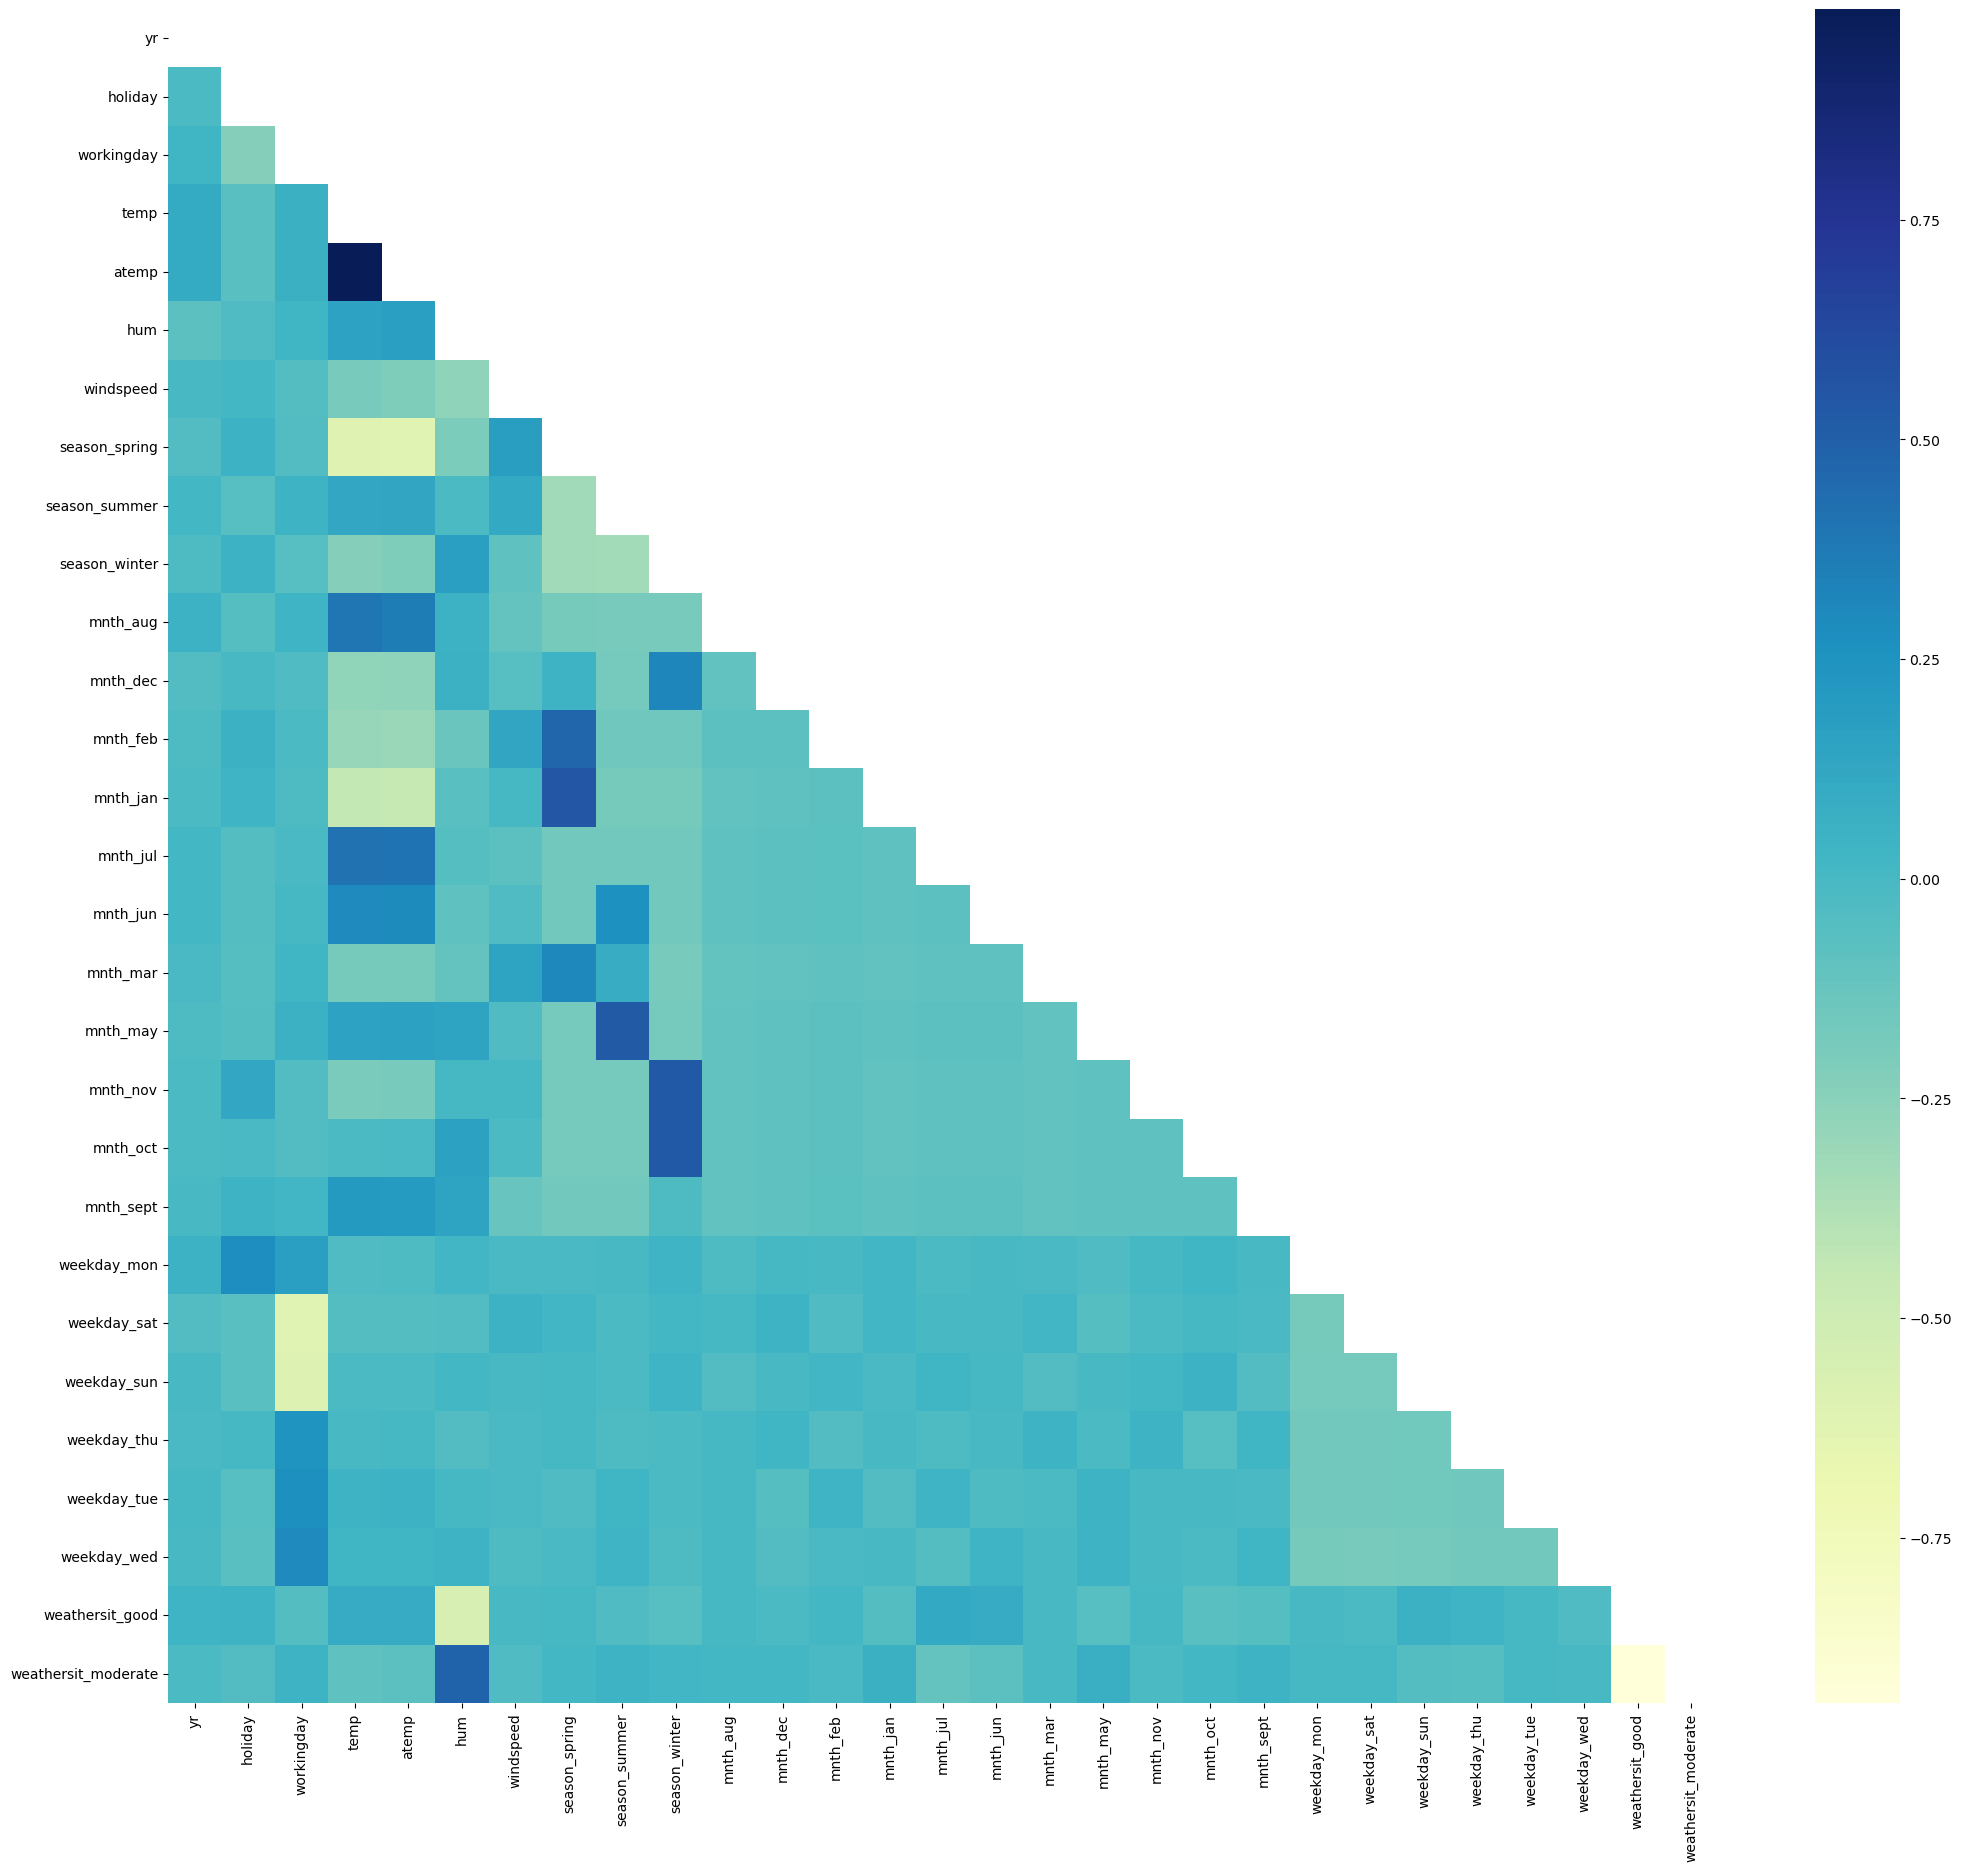

In [28]:
plt.figure(figsize =(25,22))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot=True, cmap="YlGnBu", mask=matrix)

- The heatmap effectively highlights the multicollinearity among the variables, pinpointing those that exhibit high collinearity with the target variable. 
- We will refer to this map during the development of our linear model to evaluate various correlated values, alongside the Variance Inflation Factor (VIF) and p-values. This will assist in selecting or eliminating appropriate variables from the model.

## RFE for variable Selection

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize RFE with the linear model and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]


# Display the selected features
print("Selected Features:", selected_features)



Selected Features: Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')


In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

### Creating a new training DataFrame using features selected by RFE.

In [31]:
X_train_rfe = X_train[selected_features]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_jul,mnth_sept,weekday_sat,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


In [32]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [33]:
X_train_rfe.shape

(511, 15)

## Adding constant and intercept

### Creating the Function for lm summary and VIF

In [34]:
def model(column):
    X_train_sm = sm.add_constant(X_train[column])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [35]:
#Function to calculate VIFs 
def get_vif(column):
    df1 = X_train[column]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

##  Model 1

In [36]:
column = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']

model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.50e-191
Time:                        00:47:57   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  52.1618    

##  Model 2

### Removing Feature: Dropping the variable mnth_jan due to its negative coefficient and insignificance indicated by a high p-value.

In [37]:
column = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']

model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          7.31e-192
Time:                        00:47:57   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -27.9807    

## Model 3

#### Removing Feature: Dropping the variable mnth_jan due to its negative coefficient and insignificance indicated by a VIF.

In [38]:
column = ['yr', 'holiday', 'workingday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']

model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.84e-189
Time:                        00:47:57   Log-Likelihood:                -4126.3
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1139.6258    

## Model 4

#### Removing Feature: Dropping the variable holiday due to its negative coefficient .

In [39]:
column = ['yr', 'workingday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']

model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.69e-189
Time:                        00:47:57   Log-Likelihood:                -4128.5
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     498   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1201.6995    

## Model 5

#### Removing Feature: Dropping the variable Weathersit_good due to high VIF

In [40]:
column = ['yr', 'workingday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 
       'weathersit_moderate']

model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.0
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          7.70e-164
Time:                        00:47:57   Log-Likelihood:                -4191.6
No. Observations:                 511   AIC:                             8407.
Df Residuals:                     499   BIC:                             8458.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1263.8103    

## Model 6

####  Removing Feature: Dropping the variable temp due to high VIF

In [41]:
column = ['yr', 'workingday',  'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 
       'weathersit_moderate']

model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          6.80e-131
Time:                        00:47:57   Log-Likelihood:                -4272.3
No. Observations:                 511   AIC:                             8567.
Df Residuals:                     500   BIC:                             8613.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4693.2460    

## Model 7

#### Removing Feature: Dropping the variable mnth_july due to high VIF

In [42]:
column7 = ['yr', 'workingday',  'windspeed',
       'season_spring', 'season_summer', 'season_winter',
        'mnth_sept', 'weekday_sat', 
       'weathersit_moderate']

model(column7)
get_vif(column7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          6.18e-132
Time:                        00:47:57   Log-Likelihood:                -4272.4
No. Observations:                 511   AIC:                             8565.
Df Residuals:                     501   BIC:                             8607.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4655.1084    

#### VIF < 5: Low multicollinearity. Generally acceptable; the feature does not show high linear correlation with others.

### Final Model Interpretation

-  Hypothesis Testing:
  
      - Null Hypothesis (H0): All regression coefficients are zero, i.e., H0:B1=B2=...=Bn=0

      - Alternative Hypothesis (H1): At least one coefficient 𝐵𝑖 is not zero, indicating that the model has significant predictive power


### Final Model Interpretation with Coefficient Values

1. **Windspeed (Coefficient: 3.96)**: A one-unit increase in windspeed is associated with an increase of 3.96 units in the target variable, indicating a strong positive relationship.

2. **Working Day (Coefficient: 3.29)**: Being a working day is associated with an increase of 3.29 units in the target variable, suggesting that more activity or demand occurs on working days.

3. **Season - Spring (Coefficient: 2.00)**: The transition to spring increases the target variable by 2.00 units, indicating a seasonal effect on the target variable.

4. **Season - Summer (Coefficient: 2.00)**: Similar to spring, summer also increases the target variable by 2.00 units, reinforcing the impact of the season.

5. **Year (yr) (Coefficient: 1.88)**: An increase in one year is associated with an increase of 1.88 units in the target variable, indicating a positive trend over the years.

6. **Season - Winter (Coefficient: 1.72)**: Winter contributes an increase of 1.72 units to the target variable, but it is lower than spring and summer.

7. **Weekday - Saturday (Coefficient: 1.55)**: Saturdays are associated with an increase of 1.55 units, indicating higher activity on weekends.

8. **Weather Situation - Moderate (Coefficient: 1.53)**: Moderate weather conditions lead to an increase of 1.53 units, suggesting that such conditions positively influence the target variable.

9. **Month - September (Coefficient: 1.18)**: Being in September is associated with an increase of 1.18 units, indicating a slight seasonal effect.


### Model Significance Testing

- **F-statistic (142.4)**: A high F-statistic value like this indicates that the variance explained by the model is significantly greater than the variance within the residuals. This suggests that the model as a whole explains a considerable amount of the variability in the target variable.

- **Prob (F-statistic) (6.18e-132)**: The extremely low p-value associated with the F-statistic indicates that the likelihood of observing such a high F-statistic under the null hypothesis (that all coefficients are zero) is practically nonexistent.

### Conclusion
Together, these values confirm that your model has strong explanatory power. You can confidently reject the null hypothesis, concluding that the predictors in the model significantly explain the variation in the target variable.


### Equation for best fit

Target Variable=β0+3.96⋅Windspeed+3.29⋅Working Day+2.00⋅Season - Spring+2.00⋅Season - Summer+1.88⋅Year+1.72⋅Season - Winter+1.55⋅Weekday - Saturday+1.53⋅Weather Situation - Moderate+1.18⋅Month - September+ϵ

### Residual Analysis

In [43]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [44]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[column7],y_train)
print(lr.intercept_,lr.coef_)

4655.108365567164 [ 2209.98728      421.51652018 -1767.25609489 -2561.61159976
  -339.47741145  -758.09792458   546.8668375    479.7546308
  -670.63467796]


In [45]:
y_train_pred = lr.predict(X_train[column7])

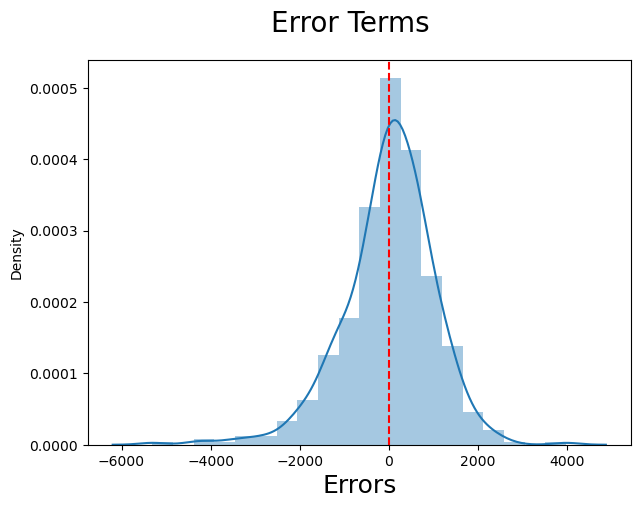

In [46]:
# residual calculations
res = y_train - y_train_pred

# Calculate the mean of the residuals
mean_res = res.mean()

# Plot the histogram of the error terms
fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
plt.axvline(mean_res, color='red', linestyle='--', label=f'Mean: {mean_res:.2f}')
fig.suptitle('Error Terms', fontsize = 20)         
plt.xlabel('Errors', fontsize = 18)
plt.show()

### # Actual vs Predicted

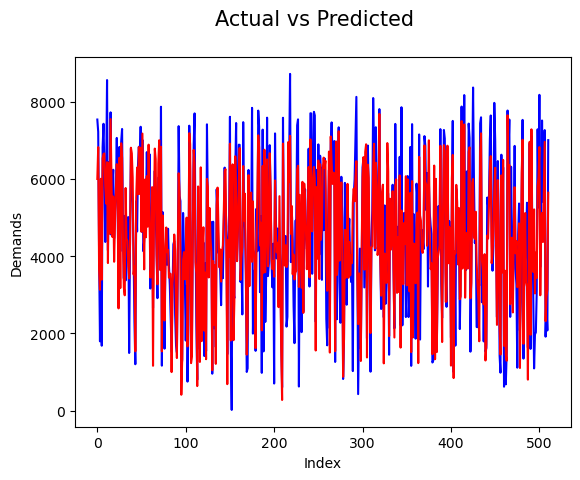

In [47]:

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Making Prediction

In [48]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,1,0


#### Prediction

In [49]:
column7 = ['yr', 'workingday',  'windspeed',
       'season_spring', 'season_summer', 'season_winter',
        'mnth_sept', 'weekday_sat', 
       'weathersit_moderate']

y_test_pred = lr.predict(X_test[column7])

Text(0, 0.5, 'y_pred')

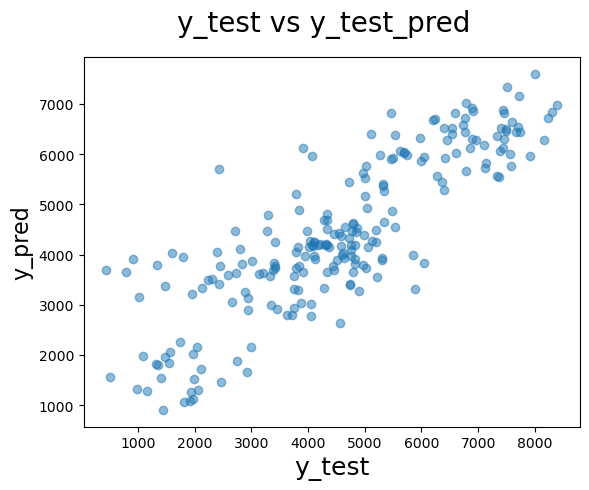

In [50]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)          
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_test_pred))

1021.4683844741774

###  R^2_score

In [52]:

r2_test = r2_score(y_test,y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print("r2_train" , round((r2_train*100),2))
print("r2_test" , round((r2_test*100),2))

r2_train 71.89
r2_test 70.92


#### Adjusted R^2 Score

#### n indicates the number of rows in the test data, while n1 indicates the number of rows in the train data

In [53]:
n = X_test.shape[0]
n1 = len(column7)

#### The number of features (predictors) is represented as p for test data and 𝑝1 for train data, indicating the number of columns in each

In [54]:
p = X_test.shape[1]
column7_df = pd.DataFrame(column7)

# Now you can access the shape
p1 = column7_df.shape[1]

#### Adjusted R-squared using the formula

In [55]:
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

In [56]:
print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 66.46
Train data adjusted r^2 : 67.87


### Conclusion

The performance metrics for the regression model indicate the following:

- **Adjusted R² Values:**
  - Test Data: **66.46**
  - Train Data: **67.87**

- **R² Values:**
  - Train Data: **71.89**
  - Test Data: **70.92**

These metrics suggest that the model explains a significant portion of the variance in the training dataset, with an R² value of **71.89**. However, there is a noticeable drop in performance when applied to the test data, as evidenced by the adjusted R² of **55.31**. This discrepancy may indicate some overfitting on the training data.

The selected features used in the model include:
- Year (`yr`)
- Working day status (`workingday`)
- Windspeed (`windspeed`)
- Seasonal indicators (`season_spring`, `season_summer`, `season_winter`)
- Month indicator for September (`mnth_sept`)
- Weekday indicator for Saturday (`weekday_sat`)
- Weather situation for moderate conditions (`weathersit_moderate`)

Future improvements may include feature engineering or exploring additional predictors to enhance model performance on unseen data.
